# Mini Project - Courier Management System

In [1]:
from datetime import datetime
import networkx as nx
import numpy as np

# Q1. Create a Dictionary of lists to store the information of shipments given in the table


In [2]:
shipments = {101: [1, 3, "14-03-2020", "25-03-2020", "Area1", "Area6", "Delivered", 198],
             102: [4, 1, "18-06-2020", "09-07-2020", "Area2", "Area4", "Delivered", 275],
             103: [2, 3, "01-12-2020", "Null", "Area5", "Area1", "In-Transit", 200],
             104: [1, 5, "23-06-2020", "25-06-2020", "Area1", "Area4", "Delivered", 314],
             105: [3, 4, "29-08-2020", "10-09-2020", "Area5", "Area3", "Delivered", 275],
             106: [5, 2, "28-06-2020", "Null", "Area3", "Area1", "In-Transit", 270]}

In [3]:
shipments

{101: [1, 3, '14-03-2020', '25-03-2020', 'Area1', 'Area6', 'Delivered', 198],
 102: [4, 1, '18-06-2020', '09-07-2020', 'Area2', 'Area4', 'Delivered', 275],
 103: [2, 3, '01-12-2020', 'Null', 'Area5', 'Area1', 'In-Transit', 200],
 104: [1, 5, '23-06-2020', '25-06-2020', 'Area1', 'Area4', 'Delivered', 314],
 105: [3, 4, '29-08-2020', '10-09-2020', 'Area5', 'Area3', 'Delivered', 275],
 106: [5, 2, '28-06-2020', 'Null', 'Area3', 'Area1', 'In-Transit', 270]}


# Q2. Create a Dictionary of to store the information of clients given in the table.



In [4]:
clients = {1: 'Phillip', 2: 'Omega III', 3: 'Ramya', 4: 'Romesh', 5: 'John'}

In [5]:
clients

{1: 'Phillip', 2: 'Omega III', 3: 'Ramya', 4: 'Romesh', 5: 'John'}

# Q3. Write a code to replace client’s id with their respective name in shipment dictionary using a loop and dictionary comprehension



In [6]:
for i in shipments.keys():
    for j in range(2):
        if shipments[i][j] in clients.keys():
            shipments[i][j] = clients[shipments[i][j]]
        print(shipments[i][j])

Phillip
Ramya
Romesh
Phillip
Omega III
Ramya
Phillip
John
Ramya
Romesh
John
Omega III


# Q4. Print all shipment details that are sent by Phillip



In [7]:
[shipments[i] for i in shipments.keys() if shipments[i][0] == 'Phillip']

[['Phillip',
  'Ramya',
  '14-03-2020',
  '25-03-2020',
  'Area1',
  'Area6',
  'Delivered',
  198],
 ['Phillip',
  'John',
  '23-06-2020',
  '25-06-2020',
  'Area1',
  'Area4',
  'Delivered',
  314]]

# Q5. Print all shipment details that are received by Ramya



In [8]:
[shipments[i] for i in shipments.keys() if shipments[i][1] == 'Ramya']

[['Phillip',
  'Ramya',
  '14-03-2020',
  '25-03-2020',
  'Area1',
  'Area6',
  'Delivered',
  198],
 ['Omega III',
  'Ramya',
  '01-12-2020',
  'Null',
  'Area5',
  'Area1',
  'In-Transit',
  200]]

# Q6. Print all shipments which are in 'In-Transit' status



In [9]:
[shipments[i] for i in shipments.keys() if shipments[i][-2] == 'In-Transit']

[['Omega III',
  'Ramya',
  '01-12-2020',
  'Null',
  'Area5',
  'Area1',
  'In-Transit',
  200],
 ['John',
  'Omega III',
  '28-06-2020',
  'Null',
  'Area3',
  'Area1',
  'In-Transit',
  270]]

# Q7. Print all shipments which are delivered within 7 days of courier Start date



In [10]:
# def days_between(d1, d2):
date_diff = lambda d1, d2: abs((datetime.strptime(d2, "%d-%m-%Y") - datetime.strptime(d1, "%d-%m-%Y")).days)
[shipments[i] for i in shipments.keys() if shipments[i][-2] != 'In-Transit' if date_diff(shipments[i][2], shipments[i][3]) <= 7]

[['Phillip',
  'John',
  '23-06-2020',
  '25-06-2020',
  'Area1',
  'Area4',
  'Delivered',
  314]]

# Q8. Print all shipments which are delivered after 15 days of courier start date or not yet been delivered.



In [11]:
date_diff = lambda d1, d2: abs((datetime.strptime(d2, "%d-%m-%Y") - datetime.strptime(d1, "%d-%m-%Y")).days)
ship = []
for i in shipments.keys():
    if shipments[i][-2] == 'In-Transit':
        ship.append(shipments[i])
    elif shipments[i][-2] != 'In-Transit':
        if date_diff(shipments[i][2], shipments[i][3]) > 15:
            ship.append(shipments[i])
ship

[['Romesh',
  'Phillip',
  '18-06-2020',
  '09-07-2020',
  'Area2',
  'Area4',
  'Delivered',
  275],
 ['Omega III',
  'Ramya',
  '01-12-2020',
  'Null',
  'Area5',
  'Area1',
  'In-Transit',
  200],
 ['John',
  'Omega III',
  '28-06-2020',
  'Null',
  'Area3',
  'Area1',
  'In-Transit',
  270]]

# Q 9. Write a function find_all_routes to display all possible routes from senders location to receivers location given in the dictionary for each shipment.¶


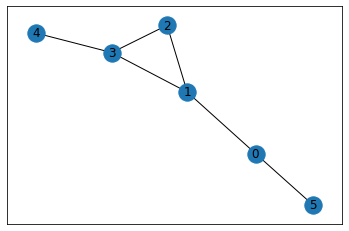

In [12]:
def find_all_routes(A):
    G = nx.from_numpy_matrix(np.array(A))
    nx.draw_networkx(G, with_labels=True)


A = [[0, 1, 0, 0, 0, 1],
     [1, 0, 1, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 1, 1, 0, 1, 0],
     [0, 0, 0, 1, 0, 0],
     [1, 0, 0, 0, 0, 0]]
find_all_routes(A)

In [13]:
def find_all_routes(matrix, u, d, visited, path):
    visited[u] = True
    path.append(u+1)
    if u == d:
        print(path)
    else:
        for i in range(6):
            if matrix[u][i] == 1 and (visited[i] != 1):
                find_all_routes(matrix, i, d, visited, path)
    path.pop()
    visited[u] = False


matrix = [[0, 1, 0, 0, 0, 1],
          [1, 0, 1, 1, 0, 0],
          [0, 1, 0, 1, 0, 0],
          [0, 1, 1, 0, 1, 0],
          [0, 0, 0, 1, 0, 0],
          [1, 0, 0, 0, 0, 0]]
visited = [False for i in range(6)]
path = []
find_all_routes(matrix, 1, 2, visited, path)

[2, 3]
[2, 4, 3]
